1. Khai báo thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2. Chi tiết về bộ dữ liệu

In [ ]:
data = pd.read_csv('survey lung cancer.csv').values
print(data)
print(data.shape)

[[ 0 74  2 ...  2  2  1]
 [ 1 59  1 ...  1  2  2]
 [ 0 63  2 ...  2  2  2]
 ...
 [ 1 38  2 ...  1  2  1]
 [ 0 26  2 ...  1  1  2]
 [ 0 61  2 ...  1  1  2]]
(55393, 16)


3. Hàm xử lý dữ liệu

In [ ]:
def xuly(data):
  for i in range(data.shape[1]):
    data[:,i] = data[:,i]/max(data[:,i])
  return data

4. Hàm sigmoid

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

5. Hàm predict

In [ ]:
def predict(x,theta):
    y_pre = np.dot(x,theta)
    return sigmoid(y_pre)

6. Hàm mất mát

In [ ]:
def cost_funciton(x,y,theta):
    n = x.shape[0]
    eps = 1e-7
    predicta = predict(x,theta)
    cost_class1 =- y * np.log(predicta+eps)
    cost_class0 =-(1-y)*np.log(1-predicta+eps)
    cost = cost_class0 + cost_class1
    return cost.sum()/n

7. Hàm huấn luyện

In [ ]:
def train(theta,X,y,lr,iters):
    cost_history = []
    m=X.shape[0]
    for i in range(iters):
        y1 = predict(X,theta)
        theta = theta - lr*np.dot(X.T, (y1-y))/m
        cost = cost_funciton(X,y,theta)
        cost_history.append(cost)
    return theta,cost_history

8. Chạy chương trình

In [ ]:
data = pd.read_csv('survey lung cancer.csv').values
X = data[0:2000,0:data.shape[1]-1]
X = np.hstack((np.ones((X.shape[0],1)),X))
X = xuly(X)
y = data[0:2000,-1]
y -= 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)
n,d=X_train.shape
theta = np.ones(d)
theta,history_loss = train(theta,X_train,y_train,0.001,10000)

9. Dựng history_loss để kiểm tra mô hình

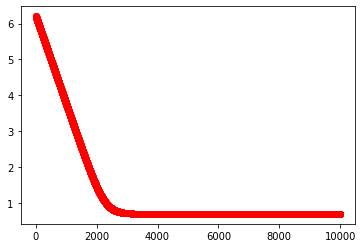

In [ ]:
plt.scatter(x= list(range(0,10000)), y = history_loss, color = 'red')
plt.show()

10. Hàm chuyển giá trị dự đoán về 0 và 1

In [ ]:
def convert(X,theta):
  y_guess = sigmoid(np.dot(X,theta))
  for i in range(len(y_guess)):
    if y_guess[i]>=0.5 : y_guess[i]=1
    else : y_guess[i]=0
  return y_guess

11. Hàm đánh giá phần trăm đoán đúng của mô hình

In [ ]:
def guess_percent(X,y,theta):
    y_guess = convert(X,theta)
    count = 0
    N = len(y_guess)
    for i in range(len(y_guess)):
        if y_guess[i] == y[i]: count +=1
    return (count/N)*100

12. Kết quả của mô hình

In [ ]:
print("Kết quả của model: ", guess_percent(X_test,y_test,theta),"%")

Kết quả của model:  55.00000000000001 %


13. Sử dụng thư viện để so sánh kết quả với mô hình

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)

print("Kết quả của library: ", lr_acc, "%")

Kết quả của library:  54.75 %
